In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
df_l=pd.read_csv('links.csv')
df_l

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [5]:
df_t=pd.read_csv('tags.csv')
df_t

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [7]:
df_m=pd.read_csv('movies.csv')
df_m

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [8]:
df_r=pd.read_csv('ratings.csv')
df_r

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### How many unique "userId" are available in "ratings.csv"?

In [71]:
df_r['userId'].nunique()

610

### Which movie has recieved maximum number of user ratings?


In [83]:
df_r['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

In [80]:
df_m[df_m['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?


In [84]:
df_m[df_m['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [86]:
df_t[df_t['movieId']==2571]['tag']

815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object

### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?


In [87]:
df_m[df_m['title']=='Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [89]:
terminator=df_r[df_r['movieId']==589]
np.mean(terminator['rating'])

3.970982142857143

### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [27]:
df_m[df_m['title']=='Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [31]:
fc=df_r[df_r['movieId']==2959]

(array([ 3.,  0.,  1.,  5.,  3., 10., 17., 49., 49., 81.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

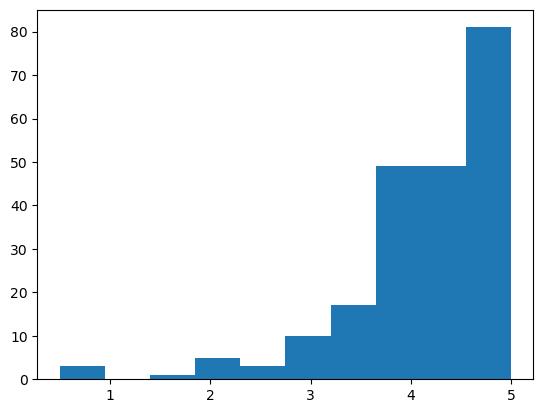

In [32]:
plt.hist(fc['rating'],)

## Aggregation

In [40]:
rating_mean=df_r.groupby('movieId',as_index=False)['rating'].mean().sort_values(by='rating',ascending=False)
rating_mean

,movieId,rating
7638,88448,5.0
8089,100556,5.0
9065,143031,5.0
9076,143511,5.0
9078,143559,5.0
...,...,...
9253,157172,0.5
7536,85334,0.5
6486,53453,0.5
5200,8494,0.5


In [38]:
rating_count=df_r.groupby('movieId',as_index=False)['rating'].count().sort_values(by='rating',ascending=False)
rating_count

,movieId,rating
314,356,329
277,318,317
257,296,307
510,593,279
1938,2571,278
...,...,...
3053,4093,1
3049,4089,1
6687,58351,1
3045,4083,1


## Merging 

In [43]:
merged=pd.merge(df_m,rating_mean,on='movieId',how='inner')

In [48]:
merged_df=pd.merge(merged,rating_count,on='movieId',how='inner')
merged_df

,movieId,title,genres,rating_x,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1
9721,193585,Flint (2017),Drama,3.500000,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1


In [49]:
merged_org=merged_df.rename(columns={'rating_x':'rating(mean)','rating_y':'rating(count)'})
merged_org

,movieId,title,genres,rating(mean),rating(count)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1
9721,193585,Flint (2017),Drama,3.500000,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1


In [52]:
filtered_df=merged_org[merged_org['rating(count)'] >50]
filtered_df

,movieId,title,genres,rating(mean),rating(count)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102
6,7,Sabrina (1995),Comedy|Romance,3.185185,54
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,3.916667,54
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,3.778846,52
8358,109487,Interstellar (2014),Sci-Fi|IMAX,3.993151,73
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,4.050847,59


In [55]:
filtered_df[filtered_df['rating(mean)']==max(filtered_df['rating(mean)'])]

,movieId,title,genres,rating(mean),rating(count)
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317


In [57]:
filtered_df.sort_values(by='rating(count)',ascending=False).head(10)

,movieId,title,genres,rating(mean),rating(count)
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238
97,110,Braveheart (1995),Action|Drama|War,4.031646,237
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224
461,527,Schindler's List (1993),Drama|War,4.225000,220


In [58]:
filtered_df[filtered_df['title']=='Inception (2010)']

,movieId,title,genres,rating(mean),rating(count)
7355,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,4.066434,143


In [59]:
merged_org1=pd.merge(merged_org,df_l,on='movieId',how='inner')

In [60]:
merged_org1

,movieId,title,genres,rating(mean),rating(count),imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49,113041,11862.0
...,...,...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1,5476944,432131.0
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1,5914996,445030.0
9721,193585,Flint (2017),Drama,3.500000,1,6397426,479308.0
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1,8391976,483455.0


### Which movie is the most popular based on  average user ratings?


In [119]:
merged_org1.sort_values(by='rating(mean)',ascending=False).head()

,movieId,title,genres,rating(mean),rating(count),imdbId,tmdbId
7638,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1,1360822,50004.0
8089,100556,"Act of Killing, The (2012)",Documentary,5.0,1,2375605,123678.0
9065,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1,805559,13968.0
9076,143511,Human (2015),Documentary,5.0,1,3327994,359364.0
9078,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1,2735292,323792.0


In [112]:
merged_org1[merged_org1['rating(mean)']==max(merged_org1['rating(mean)'])]

,movieId,title,genres,rating(mean),rating(count),imdbId,tmdbId
48,53,Lamerica (1994),Adventure|Drama,5.0,2,110299,49133.0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.0,2,113283,63076.0
121,148,"Awfully Big Adventure, An (1995)",Drama,5.0,1,112427,22279.0
405,467,Live Nude Girls (1995),Comedy,5.0,1,113674,26271.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),Drama,5.0,1,74102,5879.0
...,...,...,...,...,...,...,...
9593,176601,Black Mirror,(no genres listed),5.0,1,2492564,452830.0
9615,179133,Loving Vincent (2017),Animation|Crime|Drama,5.0,1,3262342,339877.0
9616,179135,Blue Planet II (2017),Documentary,5.0,1,6769208,463612.0
9670,184245,De platte jungle (1978),Documentary,5.0,1,78090,110775.0


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.


In [99]:
merged_org1.sort_values(by='rating(count)',ascending=False).head()

,movieId,title,genres,rating(mean),rating(count),imdbId,tmdbId
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329,109830,13.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317,111161,278.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307,110912,680.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279,102926,274.0
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278,133093,603.0


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?


In [105]:
sci_fi=  merged_org1[merged_org1['genres'].str.contains('Sci-Fi')]  

In [110]:
sci_fi.sort_values(by='rating(count)',ascending=False).iloc[2:3,:]

,movieId,title,genres,rating(mean),rating(count),imdbId,tmdbId
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238,107290,329.0


In [121]:
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [122]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'data-testid' : 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan
scrapper(5476944)

nan